# FINANCIAL MODELING - Lyft Inc.

### 💼 What Is Financial Modeling?
Financial modeling is the art of building a numerical representation of a business’s economic performance, past, present, and future. It’s typically done in Excel or Python and involves linking financial statements (such as income, balance sheet, and cash flow) with assumptions to forecast outcomes, including profit, cash flow, or valuation.

Think of it as a "what-if machine": you tweak inputs (like growth rate or costs), and the model shows how those changes ripple through the business.

### 📊 Why It’s Important
Financial modeling is essential because it helps:
Forecast performance: Predict revenue, expenses, and cash flow under different scenarios.
Make decisions: Evaluate investments, pricing strategies, or cost-cutting plans.
Value businesses: Estimate how much a company or project is worth.
Raise capital: Show lenders or investors how funds will be used and repaid.
Manage risk: Run sensitivity analyses to see how changes in key variables affect outcomes.

### 🧠 Quick Analogy
Imagine you're planning a road trip. A financial model is like your GPS. It maps out the route, estimates fuel costs, and lets you simulate detours or traffic. Without financial predictions, it would be like you're driving blind.


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Initialize Lyft ticker
lyft = yf.Ticker("LYFT")

# Pull and transpose statements
income_statement_df = lyft.financials.T
cashflow_statement_df = lyft.cashflow.T
balance_sheet_df = lyft.balance_sheet.T

In [6]:
# Ensure numeric for calculations
income_statement_df = income_statement_df.apply(pd.to_numeric, errors='coerce')
cashflow_statement_df = cashflow_statement_df.apply(pd.to_numeric, errors='coerce')
balance_sheet_df = balance_sheet_df.apply(pd.to_numeric, errors='coerce')

# Pull latest period for ratio calculation
latest_income_statement = income_statement_df.iloc[0]
latest_balance_sheet = balance_sheet_df.iloc[0]

# Check available column names in the balance sheet
# print("Balance Sheet Columns:\n", balance_sheet_df.columns.tolist())


In [7]:
key_financial_ratios_df = pd.DataFrame({
    'Gross Profit Margin': [latest_income_statement.get('Gross Profit', 0) / latest_income_statement.get('Total Revenue', 1)],
    'Operating Margin': [latest_income_statement.get('Operating Income', 0) / latest_income_statement.get('Total Revenue', 1)],
    'Net Margin': [latest_income_statement.get('Net Income', 0) / latest_income_statement.get('Total Revenue', 1)],
    'Return on Assets': [latest_income_statement.get('Net Income', 0) / latest_balance_sheet.get('Total Assets', 1)],
    'Debt-to-Equity': [
        latest_balance_sheet.get('Total Liabilities Net Minority Interest', 0)
        / latest_balance_sheet.get('Common Stock Equity', latest_balance_sheet.get('Stockholders Equity', 1))
    ]
})

In [8]:
print("🧾 Income Statement:\n")
income_statement_df.head()

🧾 Income Statement:



,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Other Operating Expenses,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-12-31,-745784.0,0.101,2.105470e+08,-7384000.0,-7384000.0,2.278400e+07,148892000.0,3.337714e+09,2.031630e+08,5.427100e+07,...,443821000.0,397073000.0,1.726320e+09,788972000.0,9.373480e+08,9.373480e+08,2.448302e+09,3.337714e+09,5.786016e+09,5.786016e+09
2023-12-31,716940.0,0.210,-1.923820e+08,3414000.0,3414000.0,-3.403200e+08,116513000.0,2.543954e+09,-1.889680e+08,-3.054810e+08,...,427239000.0,555916000.0,1.352084e+09,481004000.0,8.710800e+08,8.710800e+08,1.859635e+09,2.543954e+09,4.403589e+09,4.403589e+09
2022-12-31,-29481480.0,0.210,-1.263718e+09,-140388000.0,-140388000.0,-1.584511e+09,154798000.0,2.435736e+09,-1.404106e+09,-1.558904e+09,...,443846000.0,856777000.0,1.817692e+09,531512000.0,1.286180e+09,1.286180e+09,1.659399e+09,2.435736e+09,4.095135e+09,4.095135e+09
2021-12-31,32604930.0,0.270,-9.806960e+08,120759000.0,120759000.0,-1.062144e+09,139347000.0,1.702317e+09,-8.599370e+08,-9.992840e+08,...,402233000.0,911946000.0,1.327044e+09,411406000.0,9.156380e+08,9.156380e+08,1.506006e+09,1.702317e+09,3.208323e+09,3.208323e+09
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
income_statement_df.columns

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges', 'Write Off',
       'Restructuring And Merg

In [10]:
income_statement_df['Operating Revenue']

2024-12-31    5.786016e+09
2023-12-31    4.403589e+09
2022-12-31    4.095135e+09
2021-12-31    3.208323e+09
2020-12-31             NaN
Name: Operating Revenue, dtype: float64

In [11]:
print("💸 Cash Flow Statement:\n")
cashflow_statement_df.head()

💸 Cash Flow Statement:



,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Stock Based Compensation,Asset Impairment Charge,Amortization Of Securities,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Gain Loss On Sale Of Business,Net Income From Continuing Operations
2024-12-31,766267000.0,-50000000.0,-480818000.0,460000000.0,NaN,-83470000.0,28304000.0,11207000.0,946040000.0,771786000.0,...,330921000.0,0.0,-89141000.0,NaN,NaN,148892000.0,148892000.0,-21779000.0,-29610000.0,2.278400e+07
2023-12-31,-248063000.0,0.0,-115950000.0,0.0,NaN,-149819000.0,20176000.0,9425000.0,771786000.0,391822000.0,...,484533000.0,0.0,-68008000.0,NaN,NaN,116513000.0,116513000.0,-11278000.0,0.0,-3.403200e+08
2022-12-31,-352255000.0,0.0,-102422000.0,0.0,NaN,-114970000.0,16752000.0,10723000.0,391822000.0,531193000.0,...,750767000.0,135714000.0,-20290000.0,0.0,0.0,154798000.0,154798000.0,-60655000.0,0.0,-1.584511e+09
2021-12-31,-180897000.0,NaN,-79993000.0,0.0,0.0,-79176000.0,16521000.0,5865000.0,531193000.0,438485000.0,...,724560000.0,0.0,2587000.0,0.0,0.0,139347000.0,139347000.0,-113746000.0,-119284000.0,-1.062144e+09
2020-12-31,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-46324000.0,-46324000.0,NaN,NaN,NaN,NaN,NaN


In [12]:
print("🏦 Balance Sheet:\n")
balance_sheet_df.head()

🏦 Balance Sheet:



,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Construction In Progress,Other Properties,Machinery Furniture Equipment,Properties,Current Assets,Other Current Assets,Prepaid Assets,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents
2024-12-31,NaN,418004629.0,418004629.0,235728000.0,1.172313e+09,4.728640e+08,1.762063e+09,-930209000.0,4.728640e+08,177266000.0,...,56998000.0,228101000.0,494503000.0,0.0,2.950533e+09,966090000.0,NaN,1.984443e+09,1.225124e+09,759319000.0
2023-12-31,0.0,399805675.0,399805675.0,306524000.0,1.041818e+09,2.242120e+08,1.406678e+09,-384142000.0,2.242120e+08,176658000.0,...,72257000.0,179136000.0,482618000.0,0.0,2.577419e+09,892235000.0,NaN,1.685184e+09,1.126548e+09,558636000.0
2022-12-31,NaN,370154988.0,370154988.0,558404000.0,1.061653e+09,5.087800e+07,1.228162e+09,-549704000.0,5.087800e+07,222159000.0,...,48523000.0,168100000.0,364594000.0,0.0,2.582859e+09,786067000.0,NaN,1.796792e+09,1.515702e+09,281090000.0
2021-12-31,NaN,344938223.0,344938223.0,254112000.0,9.754340e+08,1.109932e+09,2.052650e+09,259709000.0,1.109932e+09,263997000.0,...,25270000.0,250214000.0,312872000.0,0.0,2.776070e+09,522212000.0,522212000.0,2.253858e+09,1.796533e+09,457325000.0
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,343070000.0,NaN,NaN,NaN


In [13]:
print("📊 Key Ratios:\n")
key_financial_ratios_df.head()

📊 Key Ratios:



,Gross Profit Margin,Operating Margin,Net Margin,Return on Assets,Debt-to-Equity
0,0.423141,-0.020552,0.003938,0.004192,6.085992


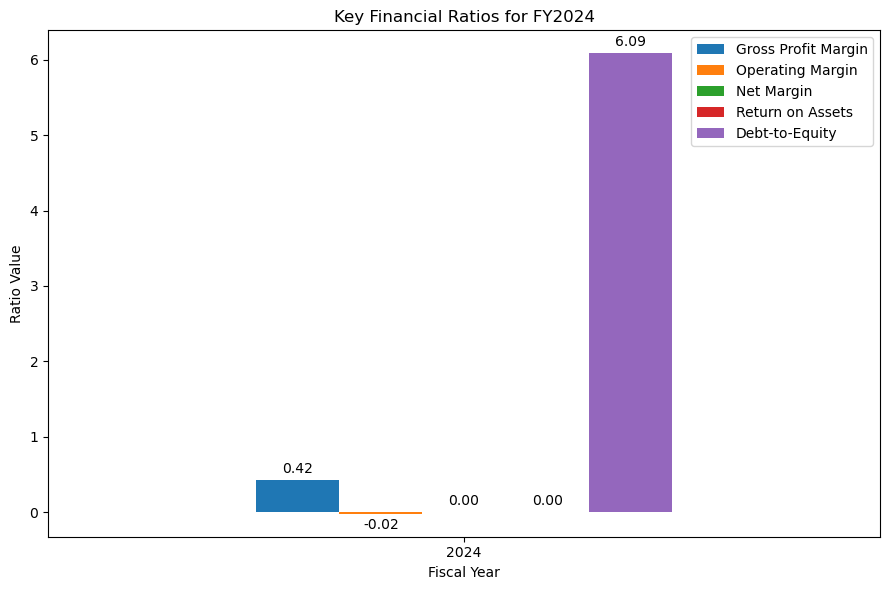

In [14]:
# Plot with custom index label
key_financial_ratios_df.index = ['2024']  # manually set fiscal year label
ax = key_financial_ratios_df.plot(kind='bar', figsize=(9, 6), rot=0)
plt.title('Key Financial Ratios for FY2024')
plt.ylabel('Ratio Value')
plt.xlabel('Fiscal Year')
plt.grid(False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Cash Flow Components Comparison

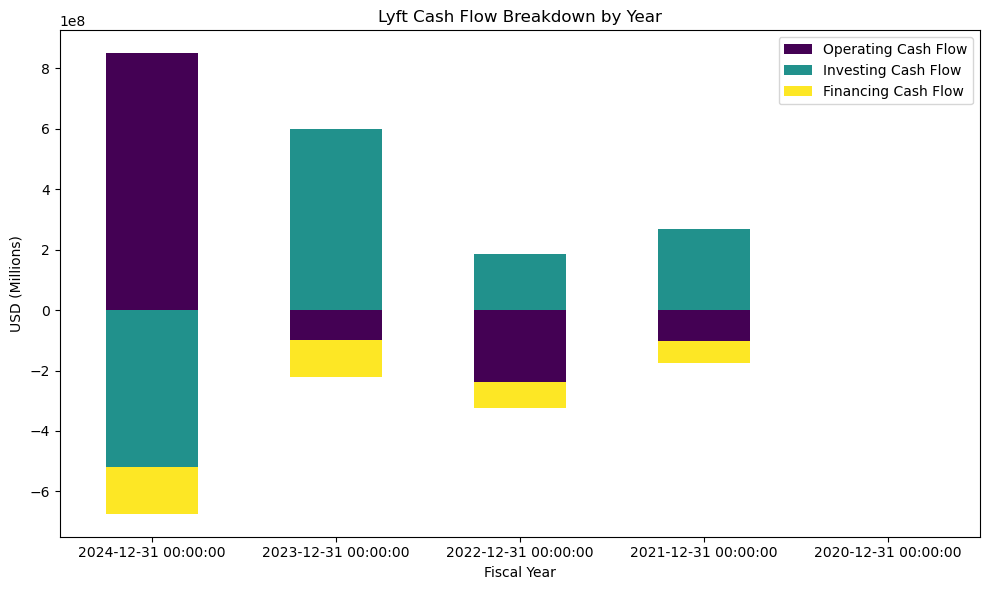

In [16]:
# Step 1: Convert index to string to clean up labels
cf_data = cashflow_statement_df[['Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow']]
cf_data.index = cf_data.index.map(str)  # works regardless of datetime type

# Step 2: Plot with horizontal x-axis labels
ax = cf_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Lyft Cash Flow Breakdown by Year')
plt.ylabel('USD (Millions)')
plt.xlabel('Fiscal Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # force horizontal
plt.tight_layout()
plt.show()


## Scenario Planning: Revenue vs. EBITDA

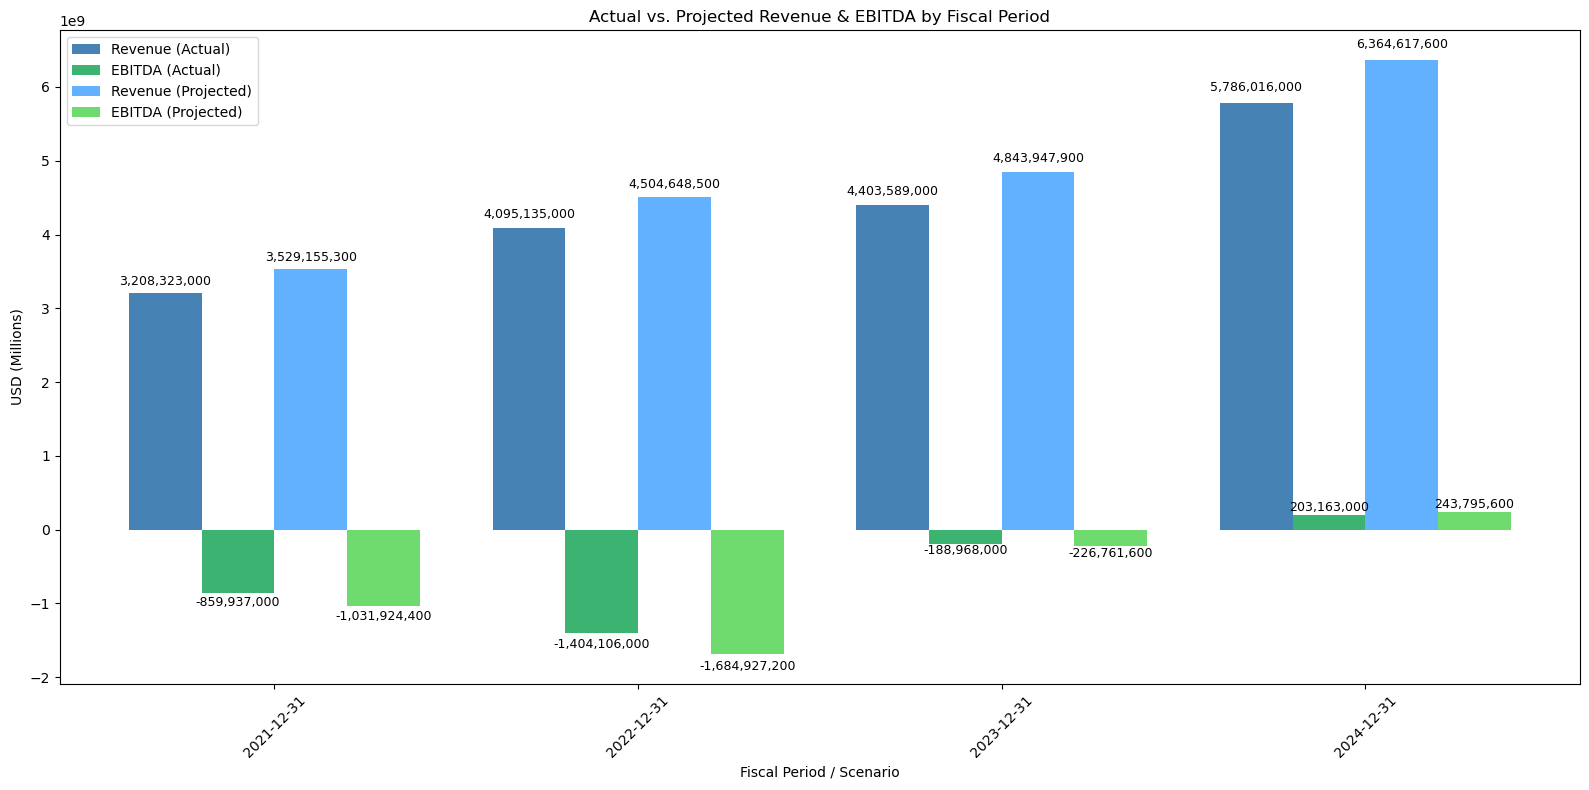

In [18]:
# Create Actuals DataFrame
actual_df = pd.DataFrame({
    'Revenue (Actual)': income_statement_df['Total Revenue'],
    'EBITDA (Actual)': income_statement_df['EBITDA']  # replace with actual column if needed
})
actual_df.index = income_statement_df.index.astype(str)

# Create Projections DataFrame (simple uplift for demo)
projection_df = pd.DataFrame({
    'Revenue (Projected)': actual_df['Revenue (Actual)'] * 1.10,  # +10% projection
    'EBITDA (Projected)': actual_df['EBITDA (Actual)'] * 1.20      # +20% projection
})
projection_df.index = actual_df.index

# Merge labels from both dataframes
actual_labels = actual_df.index.tolist()
projection_labels = projection_df.index.tolist()
all_labels = sorted(set(actual_labels).union(set(projection_labels)))

# Build safe plotting DataFrame
plot_df = pd.DataFrame(index=all_labels)
plot_df['Revenue (Actual)'] = actual_df['Revenue (Actual)'].reindex(all_labels)
plot_df['EBITDA (Actual)'] = actual_df['EBITDA (Actual)'].reindex(all_labels)
plot_df['Revenue (Projected)'] = projection_df['Revenue (Projected)'].reindex(all_labels)
plot_df['EBITDA (Projected)'] = projection_df['EBITDA (Projected)'].reindex(all_labels)
plot_df = plot_df.dropna(how='all')  # drop rows with no data

# Plot setup
x = np.arange(len(plot_df))
width = 0.2
fig, ax = plt.subplots(figsize=(16, 8))

# Bar plotting
bar1 = ax.bar(x - 1.5*width, plot_df['Revenue (Actual)'].fillna(0), width, label='Revenue (Actual)', color='steelblue')
bar2 = ax.bar(x - 0.5*width, plot_df['EBITDA (Actual)'].fillna(0), width, label='EBITDA (Actual)', color='mediumseagreen')
bar3 = ax.bar(x + 0.5*width, plot_df['Revenue (Projected)'].fillna(0), width, label='Revenue (Projected)', color='dodgerblue', alpha=0.7)
bar4 = ax.bar(x + 1.5*width, plot_df['EBITDA (Projected)'].fillna(0), width, label='EBITDA (Projected)', color='limegreen', alpha=0.7)

# Labeling function
def label_bars(bars):
    for bar in bars:
        val = bar.get_height()
        label_y = val + (abs(val) * 0.02) if val >= 0 else val - (abs(val) * 0.05)
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            label_y,
            f'{val:,.0f}',
            ha='center', va='bottom' if val >= 0 else 'top',
            fontsize=9, color='black'
        )
for bar_group in [bar1, bar2, bar3, bar4]:
    label_bars(bar_group)

# Axis formatting
ax.set_xticks(x)
ax.set_xticklabels(plot_df.index, rotation=45)
ax.set_title('Actual vs. Projected Revenue & EBITDA by Fiscal Period')
ax.set_xlabel('Fiscal Period / Scenario')
ax.set_ylabel('USD (Millions)')
ax.legend()
plt.tight_layout()
plt.show()

In [19]:
# Sanity check: are actual and projected keys overlapping?
print(set(actual_df.index) & set(projection_df.index))

# Preview the actual EBITDA
print("Actual EBITDA:\n", actual_df['EBITDA (Actual)'])

# Preview the projected EBITDA
print("Projected EBITDA:\n", projection_df['EBITDA (Projected)'])

{'2020-12-31', '2021-12-31', '2023-12-31', '2024-12-31', '2022-12-31'}
Actual EBITDA:
 2024-12-31    2.031630e+08
2023-12-31   -1.889680e+08
2022-12-31   -1.404106e+09
2021-12-31   -8.599370e+08
2020-12-31             NaN
Name: EBITDA (Actual), dtype: float64
Projected EBITDA:
 2024-12-31    2.437956e+08
2023-12-31   -2.267616e+08
2022-12-31   -1.684927e+09
2021-12-31   -1.031924e+09
2020-12-31             NaN
Name: EBITDA (Projected), dtype: float64


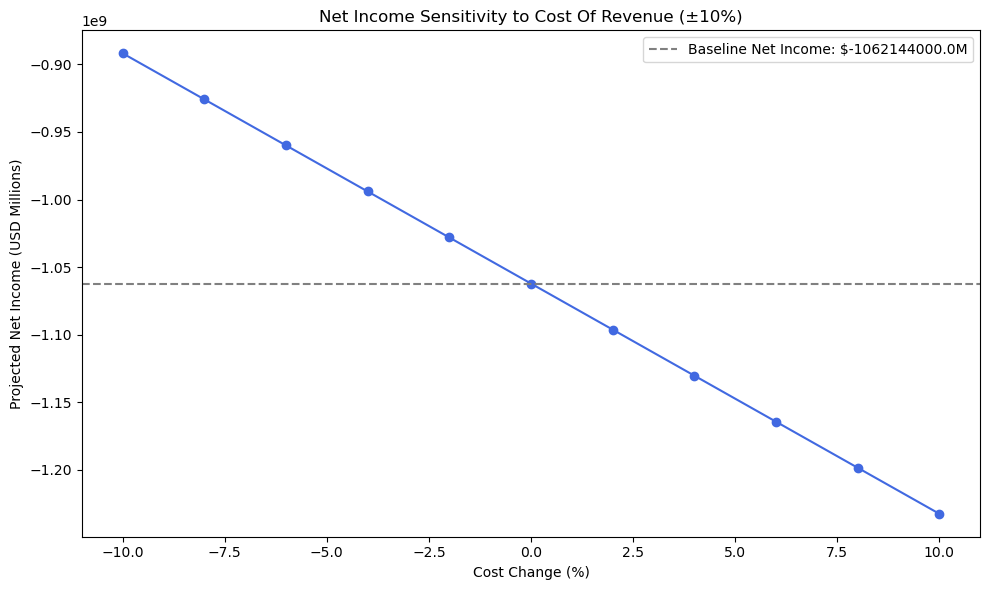

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Safely coerce to numeric and drop missing values
net_income_series = pd.to_numeric(income_statement_df['Net Income'], errors='coerce').dropna()
cost_series = pd.to_numeric(income_statement_df['Cost Of Revenue'], errors='coerce').dropna()

# Use last valid values
baseline_net_income = net_income_series.iloc[-1]
baseline_cost = cost_series.iloc[-1]

# Sensitivity calculation
cost_change = np.arange(-0.10, 0.11, 0.02)
net_income_changes = [baseline_net_income - (baseline_cost * delta) for delta in cost_change]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cost_change * 100, net_income_changes, marker='o', color='royalblue')
plt.title('Net Income Sensitivity to Cost Of Revenue (±10%)')
plt.xlabel('Cost Change (%)')
plt.ylabel('Projected Net Income (USD Millions)')
plt.axhline(y=baseline_net_income, linestyle='--', color='gray', label=f'Baseline Net Income: ${baseline_net_income:.1f}M')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

## Risck Score Comparison

In [22]:
key_financial_ratios_df.columns

Index(['Gross Profit Margin', 'Operating Margin', 'Net Margin',
       'Return on Assets', 'Debt-to-Equity'],
      dtype='object')

In [23]:
cashflow_statement_df.columns

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure',
       'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
       'End Cash Position', 'Beginning Cash Position',
       'Effect Of Exchange Rate Changes', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Proceeds From Stock Option Exercised',
       'Net Preferred Stock Issuance', 'Preferred Stock Issuance',
       'Net Common Stock Issuance', 'Common Stock Payments',
       'Common Stock Issuance', 'Net Issuance Payments Of Debt',
       'Net Short Term Debt Issuance', 'Short Term Debt Payments',
       'Short Term Debt Issuance', 'Net Long Term Debt Issuance',
       'Long Term Debt Payments', 'Long Term Debt Issuance',
       'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities',
       'Net Other Invest

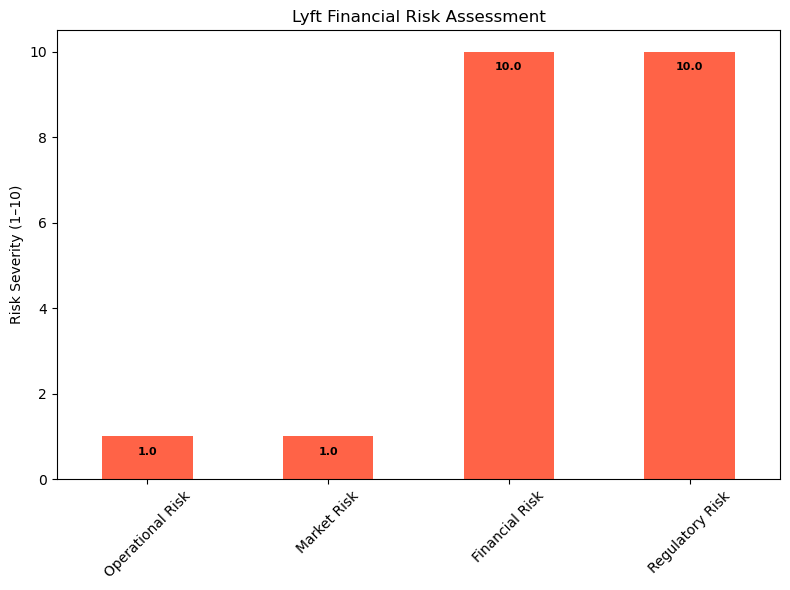

In [24]:
def score_metric(value, thresholds):
    for i, thresh in enumerate(thresholds):
        if value < thresh:
            return i + 1
    return 10

risk_scores = pd.Series({
    'Operational Risk': score_metric(key_financial_ratios_df['Operating Margin'].iloc[-1], [0, 5, 10, 15, 20]),
    'Market Risk': score_metric(key_financial_ratios_df['Gross Profit Margin'].iloc[-1], [10, 20, 40, 60]),
    'Financial Risk': score_metric(key_financial_ratios_df['Debt-to-Equity'].iloc[-1], [0.5, 1.0, 1.5, 2.0]),
    'Regulatory Risk': score_metric(cashflow_statement_df['Income Tax Paid Supplemental Data'].iloc[-1], [10, 20, 40])
})

# Create the bar chart
ax = risk_scores.plot(kind='bar', color='tomato', figsize=(8, 6))
plt.title('Lyft Financial Risk Assessment')
plt.ylabel('Risk Severity (1–10)')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

# Add data labels directly above each bar
for i, (label, value) in enumerate(risk_scores.items()):
    ax.text(i, value - 0.25, f'{value:.1f}', ha='center', va='top', fontsize=8, fontweight='bold', color='black')
plt.show()